# SpaceShip Titanic

In [822]:
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer

In [823]:


train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')

<AxesSubplot:>

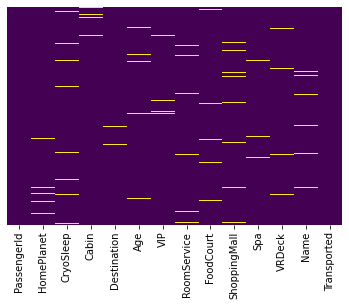

In [824]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [825]:

def impute_by_KNN(df,column_name):
    fact_col, lable = pd.factorize(df[column_name])
    imputer = KNNImputer(n_neighbors=5, weights="uniform", add_indicator = True)
    imputedHomePlanet = imputer.fit_transform([fact_col])
    imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
    df.drop(columns=column_name, inplace=True)
    df[column_name ] = imputedHomePlanet[0]
    return df
    

In [826]:
def impute_by_Simple_mean(df, column_name:list):
    imp = SimpleImputer( strategy='mean')
    imp.fit(df[column_name])
    transformed = imp.transform(df[column_name])
    # print(transformed)
    df = df.drop(df[column_name], axis = 1)
    df[column_name ] = transformed
    return df
    
    


In [827]:
# to_impute_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# for i in to_impute_num:
#     train = impute_by_Simple_mean(train, [i] )

In [828]:
# to_impute_knn = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
# for i in to_impute_knn:
#     train = impute_by_KNN(train,i)

In [829]:
# factHome, lable = pd.factorize(train['HomePlanet'])
# factHome

In [830]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights="uniform", add_indicator = True)
# imputedHomePlanet = imputer.fit_transform([factHome])

<AxesSubplot:>

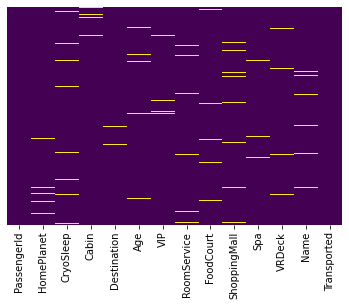

In [831]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Preserving Distict characters for Later Purpose

In [832]:

def remove_missing_values(df, to_impute_num, to_impute_knn):
    for i in to_impute_num:
        df = impute_by_Simple_mean(df, [i] )
    for i in to_impute_knn:
        df = impute_by_KNN(df,i)
    
    return df
    

Now the dataset Does not have any Null Values

In [833]:
to_impute_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
to_impute_knn = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

In [834]:
train = remove_missing_values(train, to_impute_num, to_impute_knn)
test =  remove_missing_values(test, to_impute_num, to_impute_knn)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_2164/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_2164/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_2164/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_2164/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and

In [835]:
Name = train['Name']
PassengerId =  train['PassengerId']
Cabin = train['Cabin']
train.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

Saving these columns for later use

In [836]:
df = pd.DataFrame(columns=  ['Name', 'PassengerId', 'Cabin'] )
df['Name'] = Name
df['PassengerId'] = PassengerId
df['Cabin'] = Cabin
df.to_csv('preprocessed_data/train_saved_columns.csv')

In [837]:
Name = test['Name']
PassengerId =  test['PassengerId']
Cabin = test['Cabin']
test.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

In [838]:
df = pd.DataFrame(columns=  ['Name', 'PassengerId', 'Cabin'] )
df['Name'] = Name
df['PassengerId'] = PassengerId
df['Cabin'] = Cabin
df.to_csv('preprocessed_data/test_saved_columns.csv')

In [839]:
train.to_csv(r'preprocessed_data\train_wo_missing.csv')
test.to_csv(r'preprocessed_data\test_wo_missing.csv')

<AxesSubplot:>

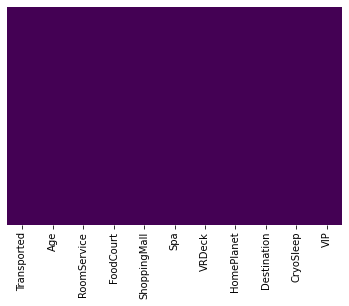

In [840]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Getting Dummies

In [841]:
# dummies  = pd.get_dummies(train['HomePlanet'], drop_first = True)
# dummies  = pd.get_dummies(train['HomePlanet'])

In [842]:
to_impute_knn

['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

In [843]:
def encode(df, to_impute_knn):
    for i in to_impute_knn:
        dummies  = pd.get_dummies(df[i], drop_first = True, prefix=i)
        df = pd.concat([df,dummies], axis=1)
        df= df.drop(i, axis = 1)
    return df
        
    

In [844]:
train = encode(train, to_impute_knn)
test  = encode(test,to_impute_knn )

In [845]:
train['Transported'], lable= pd.factorize(train['Transported'])

In [846]:
train.to_csv(r'preprocessed_data\train_encoded.csv')
test.to_csv(r'preprocessed_data\test_encoded.csv')

In [847]:
train

,Transported,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True
0,0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0
1,1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0,1
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0
4,1,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,1
8689,0,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
8690,1,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,1,0,0
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0


In [848]:
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True
0,27.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,0,0,0,1,0,0
2,31.000000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0,0,1,0,0
4,20.000000,10.0,0.0,635.0,0.0,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,0,0,0,1,0,0
4274,28.658146,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,1,0,1,0,0,0


# Outlier Detection

In [849]:
import matplotlib.pyplot as plt

In [850]:
df = pd.read_csv(r'preprocessed_data\train_saved_columns.csv')
column = 'Age'
    # print( train[column].shape, PassengerId.shape)

df1 = pd.read_csv(r'preprocessed_data\train_saved_columns.csv')
df2 = pd.read_csv(r'preprocessed_data\train_encoded.csv')

# sns.scatterplot(x = df2['Age'], y = df1['PassengerId'])
    

In [851]:
df2['PassengerId'] = df1['PassengerId']

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

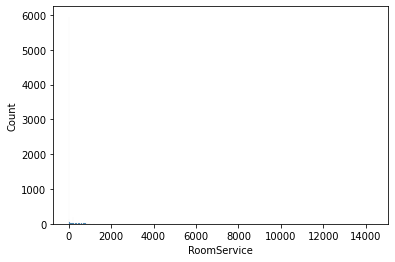

In [852]:
sns.histplot(data = df2 ,  x = 'RoomService'  )

{'whiskers': [<matplotlib.lines.Line2D at 0x20f2975f940>,
 'caps': [<matplotlib.lines.Line2D at 0x20f2975fee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f2975f610>],
 'medians': [<matplotlib.lines.Line2D at 0x20f2983a4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f2983a790>],
 'means': []}

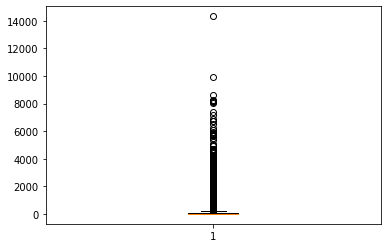

In [853]:
plt.boxplot(data = df2, x = 'RoomService')

In [854]:

import numpy as np
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [855]:
outliers_z = detect_outliers(df2['Age'])
len(outliers_z)

30

In [856]:
def outlier_detection_using_Iqr(data):
    outliers = []
    data = sorted(data)
    quantile1, quantile3= np.percentile(data,[25,75])
    iqr_value=quantile3-quantile1
    print(iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value)
    for i in data :
        if i<lower_bound_val or  i> upper_bound_val:
            outliers.append(i)
    return outliers
    

In [857]:
outliers_iqr = outlier_detection_using_Iqr(df2['Age'])

17.0


In [858]:
len(outliers_z), len(outliers_iqr)
outliers_iqr

[63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 63.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 64.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 72.0,
 72.0,
 72.0,
 73.0,
 73.0,
 73.0,
 73.0,
 73.0,
 73.0,
 73.0,

In [859]:
train['Expense'] = train['RoomService'] + train['VRDeck'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa']
test['Expense'] = test['RoomService'] + test['VRDeck'] + test['FoodCourt'] + test['ShoppingMall'] + train['Spa']

<AxesSubplot:xlabel='Expense', ylabel='Count'>

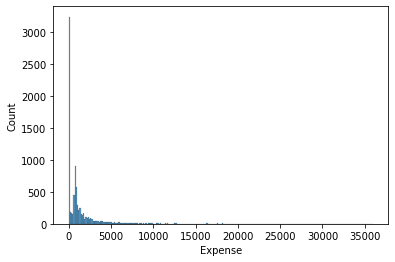

In [860]:
sns.histplot(data = train , x = 'Expense')

In [861]:
# train = train.drop(['RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Spa'], axis = 1)
# test = test.drop(['RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Spa'], axis = 1)



<AxesSubplot:xlabel='Expense', ylabel='Count'>

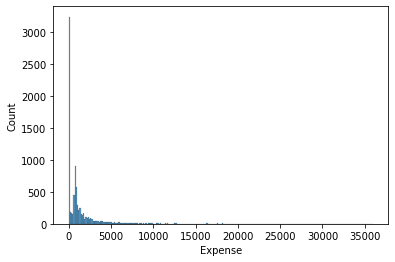

In [862]:
sns.histplot(data = train , x = 'Expense')

In [863]:
train = train[train.Age < min(outliers_z)]



In [864]:
train.loc[train['Expense'] > 0, 'Expense'] = 1
test.loc[test['Expense'] > 0, 'Expense'] = 1


c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [865]:
test['Expense'].value_counts()

1.0    3238
0.0    1039
Name: Expense, dtype: int64

In [866]:
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense
0,27.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,0,0,0,1,0,0,1.0
2,31.000000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0,0,1,0,0,1.0
4,20.000000,10.0,0.0,635.0,0.0,0.0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,1.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,0,0,0,1,0,0,1.0
4274,28.658146,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1.0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,1,0,1,0,0,0,1.0


In [867]:
train

,Transported,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense
0,0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0.0
1,1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0,1.0
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0,1,1.0
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0,1.0
4,1,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,1,1.0
8689,0,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0.0
8690,1,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,1,0,0,1.0
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0,1.0


In [868]:
def remove_outliers(data):
    def detect_outliers(data):
        outliers=[]
        threshold=3
        mean = np.mean(data)
        std =np.std(data)
        
        
        for i in data:
            z_score= (i - mean)/std 
            if np.abs(z_score) > threshold:
                outliers.append(i)
        return outliers
    def outlier_detection_using_Iqr(data):
        outliers = []
        data = sorted(data)
        quantile1, quantile3= np.percentile(data,[25,75])
        iqr_value=quantile3-quantile1
        lower_bound_val = quantile1 -(1.5 * iqr_value) 
        upper_bound_val = quantile3 +(1.5 * iqr_value)
        for i in data :
            if i<lower_bound_val or  i> upper_bound_val:
                outliers.append(i)
        return outliers
    
    
    outliers_z = detect_outliers(data['Age'])
    outliers_iqr = outlier_detection_using_Iqr(data['Age'])
    
    data['Expense'] = data['RoomService'] + data['VRDeck'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa']
    
    # data = data.drop(['RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Spa'], axis = 1)
    data.loc[data['Expense'] > 0, 'Expense'] = 1
    return data

In [869]:
train = remove_outliers(train)
test =  remove_outliers(test)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_2164/2302693331.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Expense'] = data['RoomService'] + data['VRDeck'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa']
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [870]:
train.to_csv(r'preprocessed_data/train_wo_outliers_all.csv')
test.to_csv(r'preprocessed_data/test_wo_outliers_all.csv')

In [871]:
def remove_outliers(data):
    def detect_outliers(data):
        outliers=[]
        threshold=3
        mean = np.mean(data)
        std =np.std(data)
        
        
        for i in data:
            z_score= (i - mean)/std 
            if np.abs(z_score) > threshold:
                outliers.append(i)
        return outliers
    def outlier_detection_using_Iqr(data):
        outliers = []
        data = sorted(data)
        quantile1, quantile3= np.percentile(data,[25,75])
        iqr_value=quantile3-quantile1
        lower_bound_val = quantile1 -(1.5 * iqr_value) 
        upper_bound_val = quantile3 +(1.5 * iqr_value)
        for i in data :
            if i<lower_bound_val or  i> upper_bound_val:
                outliers.append(i)
        return outliers
    
    
    outliers_z = detect_outliers(data['Age'])
    outliers_iqr = outlier_detection_using_Iqr(data['Age'])
    
    data['Expense'] = data['RoomService'] + data['VRDeck'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa']
    
    data = data.drop(['RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Spa'], axis = 1)
    data.loc[data['Expense'] > 0, 'Expense'] = 1
    return data

In [872]:
train = remove_outliers(train)
test =  remove_outliers(test)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_2164/3273865858.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Expense'] = data['RoomService'] + data['VRDeck'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa']


In [873]:
train.to_csv(r'preprocessed_data/train_wo_outliers.csv')
test.to_csv(r'preprocessed_data/test_wo_outliers.csv')